# Setup

In [11]:
import os
import re
import json
import glob

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import pandas as pd

from astropy.constants import R_earth
import tensorflow as tf

from geexhp import datagen, datamod, datavis
from geexhp import stages as st_
from geexhp import datavis as dvis
dvis.configure_matplotlib()

In [12]:
# Load the dictionary containing the normalization statistics
with open('../data/normalization_stats.json', 'r') as f:
    stats = json.load(f)

# Load the best model
model_load = tf.keras.models.load_model("NN_22-tuner.keras")

In [13]:
# Denormalization functions for physical and chemical outputs
def denormalize_physical(predictions, stats, targets):
    original = np.zeros_like(predictions)
    for i, target in enumerate(targets):
        # Get stats: min, max, and best_n
        min_val = stats['outputs'][target]['min']
        max_val = stats['outputs'][target]['max']
        best_n = stats['outputs'][target]['best_n']
        # Inverse transformation:
        # prediction = ((val - min) / (max - min))^(1/best_n)
        # Thus, val = min + (max - min) * (prediction)^(best_n)
        original[:, i] = min_val + (max_val - min_val) * (predictions[:, i] ** best_n)
    return original

def denormalize_chemical(predictions, stats, targets):
    original = np.zeros_like(predictions)
    for i, target in enumerate(targets):
        best_n = stats['outputs'][target]['best_n']
        # Inverse transformation: prediction = val^(1/best_n) so val = prediction^(best_n)
        original[:, i] = predictions[:, i] ** best_n
    return original

In [14]:
# Target lists
physical_targets = [
    "OBJECT-RADIUS-REL-EARTH",
    "OBJECT-GRAVITY",
    "ATMOSPHERE-TEMPERATURE",
    "ATMOSPHERE-PRESSURE"
]
main_chemical_targets = ['O2', 'O3']
other_chemical_targets = ['CH4', 'CO', 'CO2', 'H2O', 'N2', 'N2O']

In [15]:
# Just for fun :3
def format_title_luvoir(file_name):
    base = file_name.replace('.npy', '')
    parts = base.split('_')

    if parts[-1].lower() == "luvoir":
        parts.pop()

    if len(parts) >= 2:
        era = parts[0]
        distance = parts[1]
    else:
        match = re.match(r"(.+?)(\d+pc)$", parts[0], flags=re.IGNORECASE)
        if match:
            era, distance = match.groups()
        else:
            era = parts[0]
            distance = ""

    era = era.capitalize().replace("without", " without ")
    distance = re.sub(r"(\d+)(pc)", r"\1 pc", distance, flags=re.IGNORECASE)

    if distance:
        title = f"{era} at {distance} - LUVOIR-B"
    else:
        title = f"{era} - LUVOIR-B"
        
    return title

def get_stage_from_filename(file_name):
    lower = file_name.lower()
    if "modern" in lower:
        return "modern"
    elif "proterozoic" in lower:
        return "proterozoic"
    elif "archean" in lower:
        return "archean"
    else:
        return "modern"

# LUVOIR-B

Processing file: proterozoic5pc_luvoir.npy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 434ms/step

Physical Outputs Comparison:


,Target,Prediction,True Value,Difference
0,OBJECT-RADIUS-REL-EARTH,1.032316,0.998887,0.033429
1,OBJECT-GRAVITY,10.299541,9.807000,0.492541
2,ATMOSPHERE-TEMPERATURE,276.067383,289.000000,-12.932617
3,ATMOSPHERE-PRESSURE,1119.727905,959.000000,160.727905



Main Chemical Outputs Comparison:


,Target,Prediction,True Value,Difference
0,O2,2.694960e-03,2.629730e-03,6.524000e-05
1,O3,5.000000e-08,3.000000e-08,2.000000e-08



Other Chemical Outputs Comparison:


,Target,Prediction,True Value,Difference
0,CH4,4.697680e-03,2.139460e-03,0.002558
1,CO,2.611000e-05,1.741000e-05,0.000009
2,CO2,3.358262e-02,1.252251e-02,0.021060
3,H2O,7.650740e-03,4.682740e-03,0.002968
4,N2,9.532359e-01,9.780081e-01,-0.024772
5,N2O,1.000000e-08,1.000000e-08,0.000000


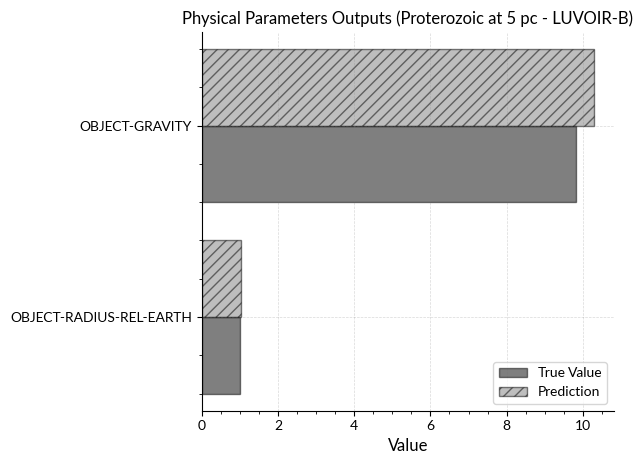

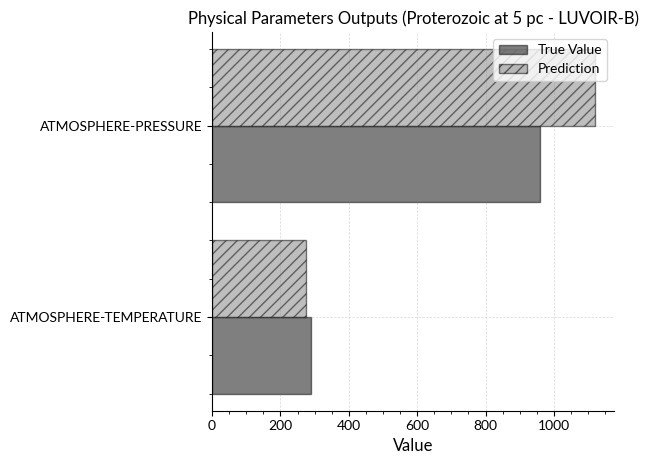

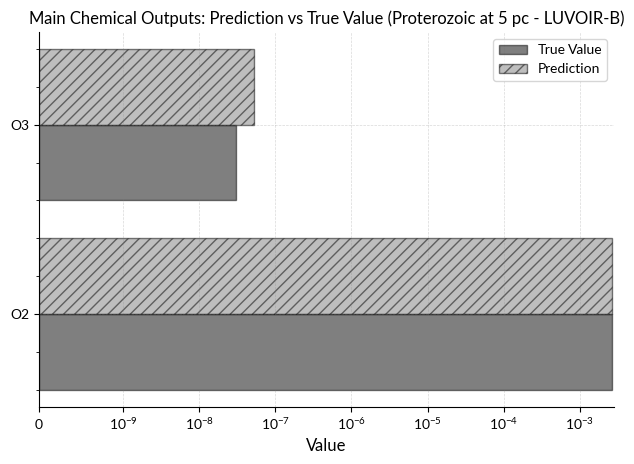

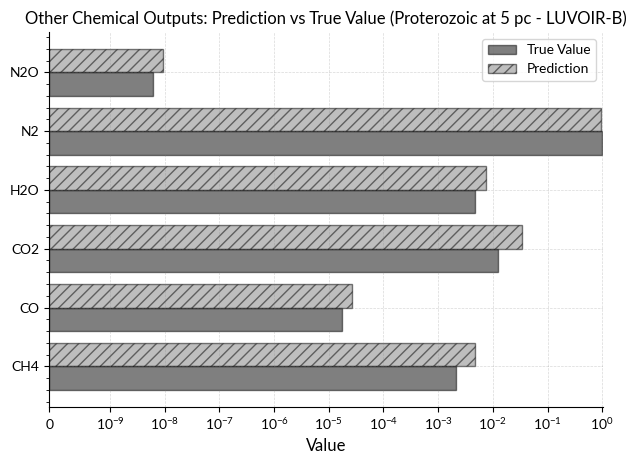



Processing file: modernwithoutO3_10pc_luvoir.npy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step

Physical Outputs Comparison:


,Target,Prediction,True Value,Difference
0,OBJECT-RADIUS-REL-EARTH,1.168399,0.998887,0.169512
1,OBJECT-GRAVITY,12.531924,9.807000,2.724924
2,ATMOSPHERE-TEMPERATURE,277.919739,288.200000,-10.280261
3,ATMOSPHERE-PRESSURE,1663.707275,1013.000000,650.707153



Main Chemical Outputs Comparison:


,Target,Prediction,True Value,Difference
0,O2,1.105305e-01,0.210931,-1.004007e-01
1,O3,1.000000e-08,0.000000,1.000000e-08



Other Chemical Outputs Comparison:


,Target,Prediction,True Value,Difference
0,CH4,2.000000e-07,1.720000e-06,-1.520000e-06
1,CO,7.600000e-07,3.210000e-06,-2.450000e-06
2,CO2,3.060300e-04,3.830100e-04,-7.697000e-05
3,H2O,4.243400e-04,4.620700e-04,-3.773000e-05
4,N2,8.743212e-01,7.882168e-01,8.610447e-02
5,N2O,5.000000e-08,3.200000e-07,-2.700000e-07


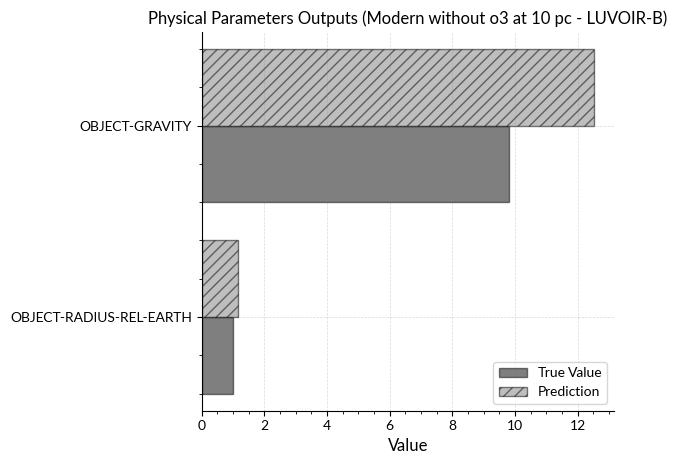

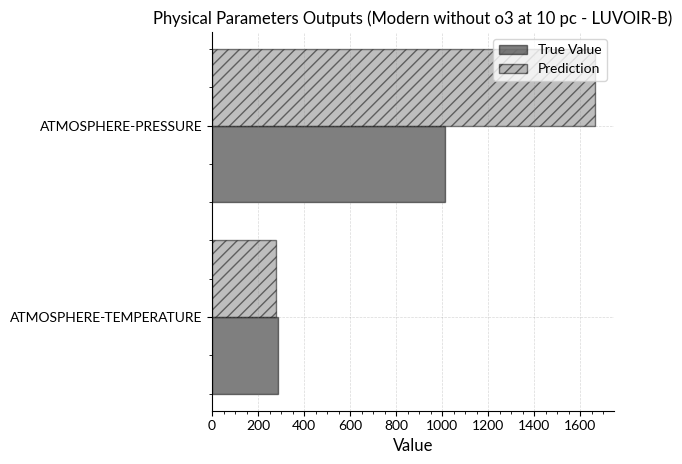

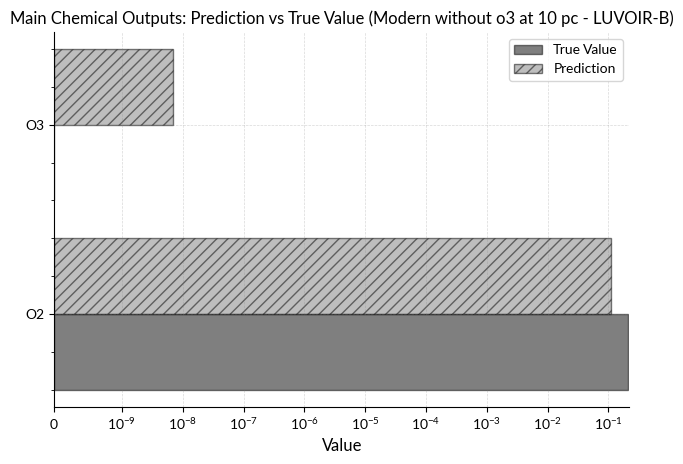

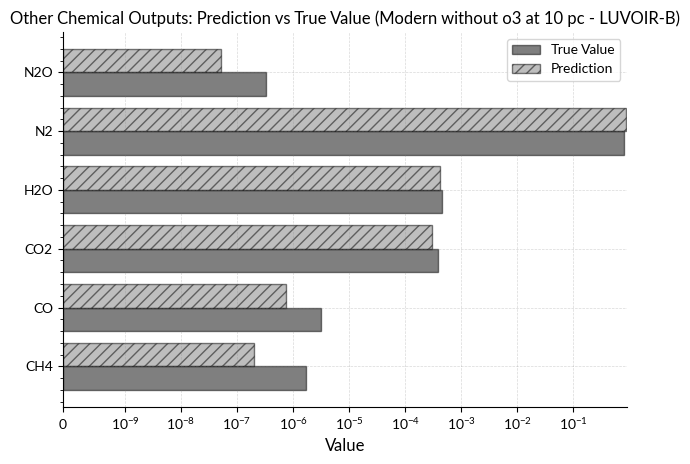



Processing file: archean5pc_luvoir.npy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step

Physical Outputs Comparison:


,Target,Prediction,True Value,Difference
0,OBJECT-RADIUS-REL-EARTH,1.210926,0.998887,0.212039
1,OBJECT-GRAVITY,13.408238,9.807000,3.601238
2,ATMOSPHERE-TEMPERATURE,274.479095,276.207386,-1.728291
3,ATMOSPHERE-PRESSURE,1904.649780,1000.000000,904.649780



Other Chemical Outputs Comparison:


,Target,Prediction,True Value,Difference
0,CH4,0.002028,0.001927,0.000101
1,CO,0.001064,0.001609,-0.000544
2,CO2,0.007194,0.012595,-0.005401
3,H2O,0.000105,0.000162,-0.000057
4,N2,0.985838,0.983706,0.002131
5,N2O,0.000000,0.000000,0.000000


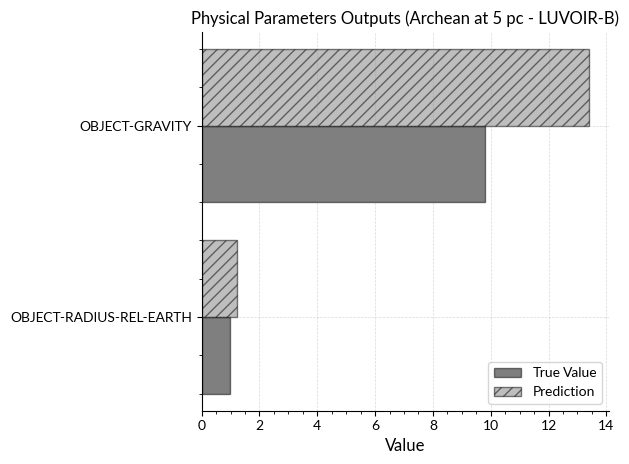

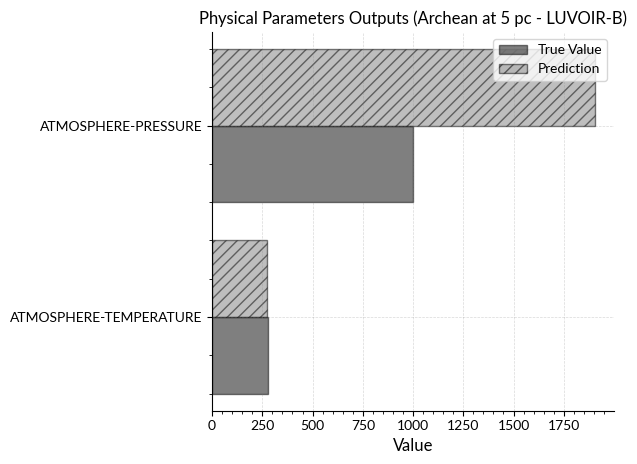

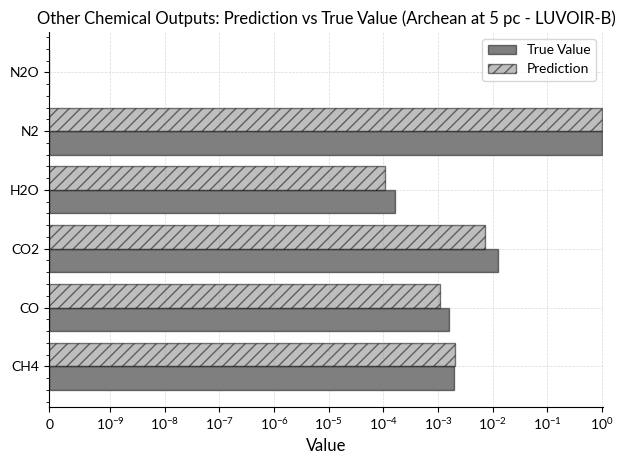



Processing file: archean10pc_luvoir.npy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step

Physical Outputs Comparison:


,Target,Prediction,True Value,Difference
0,OBJECT-RADIUS-REL-EARTH,1.208050,0.998887,0.209163
1,OBJECT-GRAVITY,13.348205,9.807000,3.541205
2,ATMOSPHERE-TEMPERATURE,278.325500,276.207386,2.118114
3,ATMOSPHERE-PRESSURE,1886.840210,1000.000000,886.840332



Other Chemical Outputs Comparison:


,Target,Prediction,True Value,Difference
0,CH4,0.002429,0.001927,0.000502
1,CO,0.001520,0.001609,-0.000089
2,CO2,0.008142,0.012595,-0.004454
3,H2O,0.000175,0.000162,0.000013
4,N2,0.985746,0.983706,0.002039
5,N2O,0.000000,0.000000,0.000000


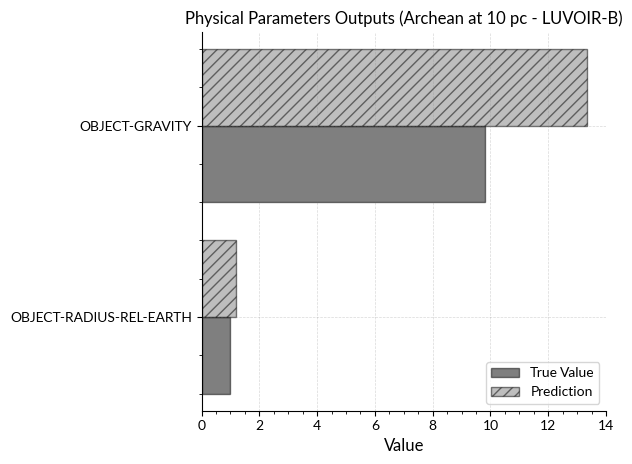

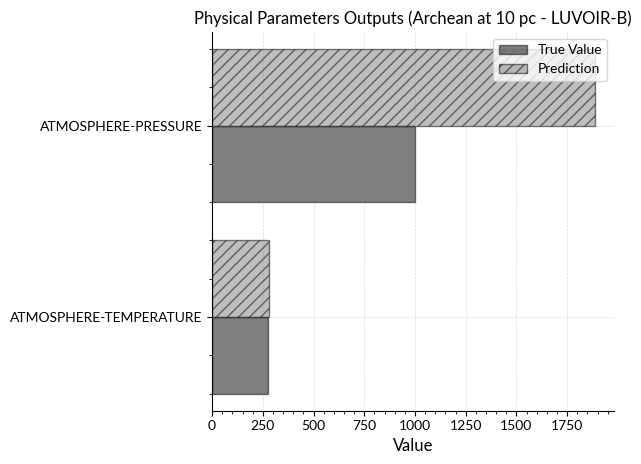

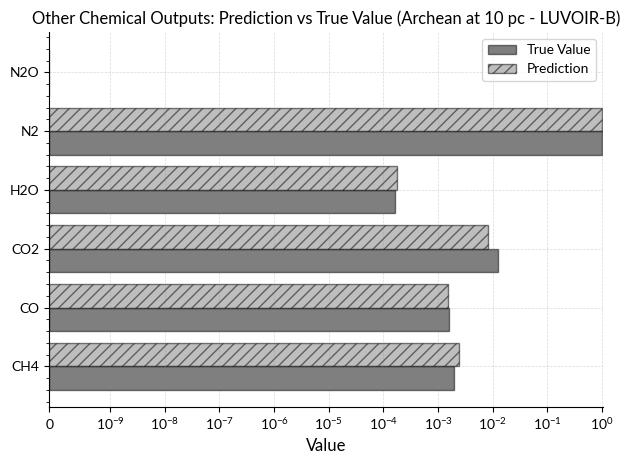



Processing file: archean15pc_luvoir.npy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step

Physical Outputs Comparison:


,Target,Prediction,True Value,Difference
0,OBJECT-RADIUS-REL-EARTH,1.161303,0.998887,0.162416
1,OBJECT-GRAVITY,12.459713,9.807000,2.652713
2,ATMOSPHERE-TEMPERATURE,284.458130,276.207386,8.250744
3,ATMOSPHERE-PRESSURE,1640.951538,1000.000000,640.951416



Other Chemical Outputs Comparison:


,Target,Prediction,True Value,Difference
0,CH4,0.002669,0.001927,0.000742
1,CO,0.001559,0.001609,-0.000050
2,CO2,0.016931,0.012595,0.004335
3,H2O,0.000116,0.000162,-0.000045
4,N2,0.965619,0.983706,-0.018087
5,N2O,0.000000,0.000000,0.000000


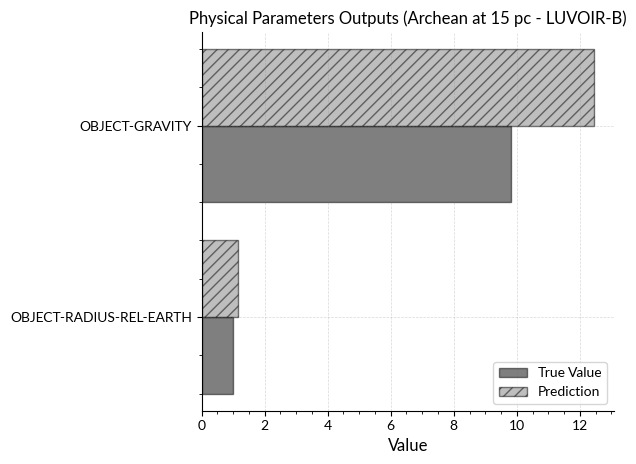

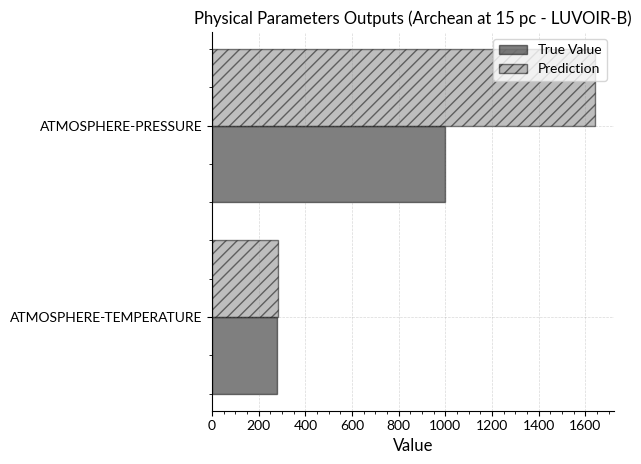

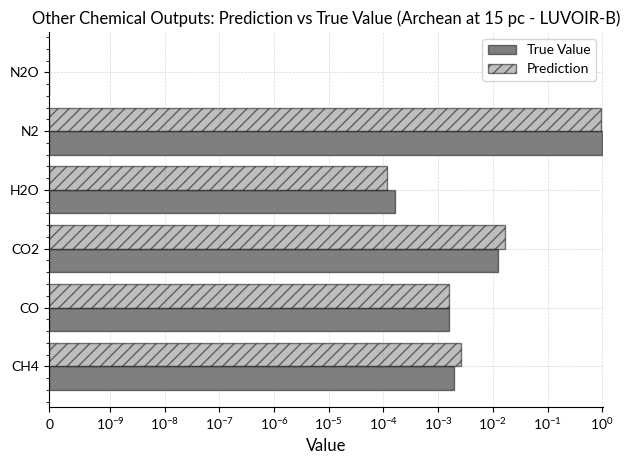



Processing file: modern15pc_luvoir.npy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step

Physical Outputs Comparison:


,Target,Prediction,True Value,Difference
0,OBJECT-RADIUS-REL-EARTH,1.115379,0.998887,0.116492
1,OBJECT-GRAVITY,11.619725,9.807000,1.812724
2,ATMOSPHERE-TEMPERATURE,281.821136,288.200000,-6.378864
3,ATMOSPHERE-PRESSURE,1423.435181,1013.000000,410.435181



Main Chemical Outputs Comparison:


,Target,Prediction,True Value,Difference
0,O2,0.265562,0.210931,0.054631
1,O3,0.000004,0.000002,0.000002



Other Chemical Outputs Comparison:


,Target,Prediction,True Value,Difference
0,CH4,2.010000e-06,1.720000e-06,2.900000e-07
1,CO,4.280000e-06,3.210000e-06,1.070000e-06
2,CO2,4.983700e-04,3.830100e-04,1.153700e-04
3,H2O,7.724400e-04,4.620700e-04,3.103800e-04
4,N2,7.354994e-01,7.882168e-01,-5.271731e-02
5,N2O,4.200000e-07,3.200000e-07,1.000000e-07


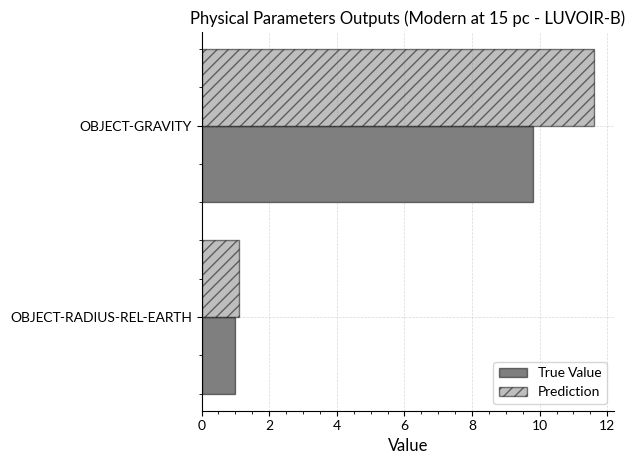

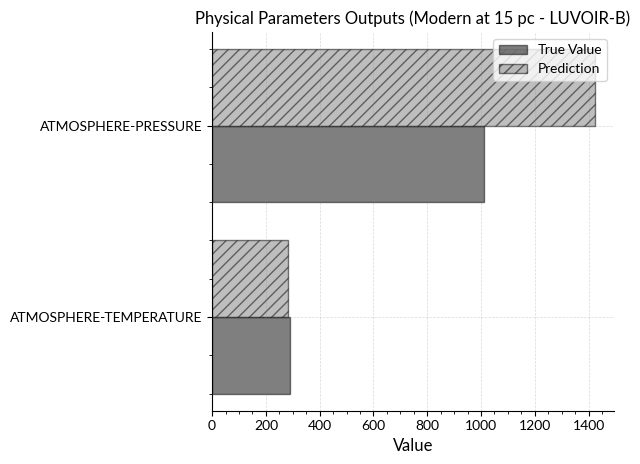

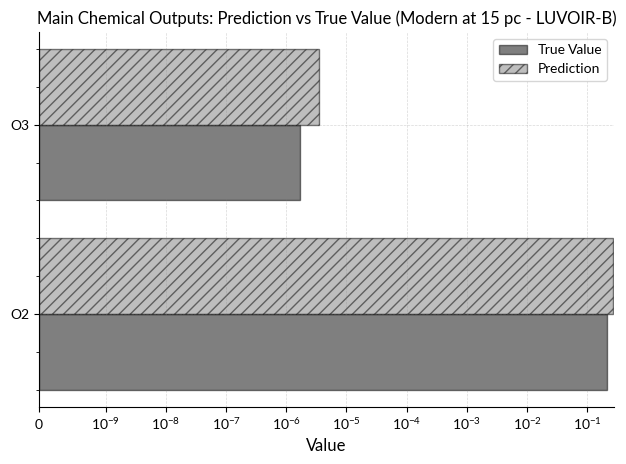

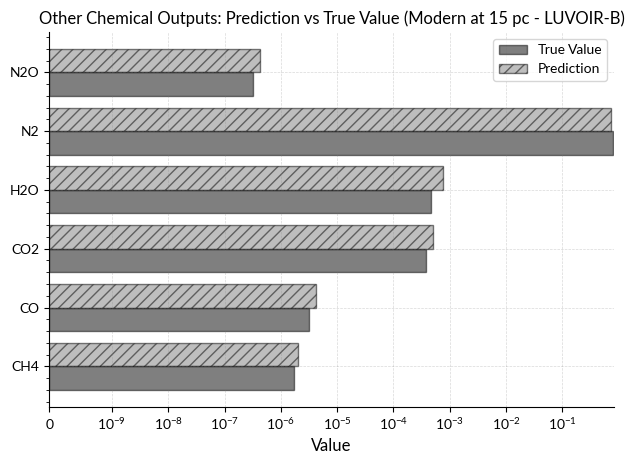



Processing file: modern10pc_luvoir.npy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step

Physical Outputs Comparison:


,Target,Prediction,True Value,Difference
0,OBJECT-RADIUS-REL-EARTH,1.141920,0.998887,0.143034
1,OBJECT-GRAVITY,12.083732,9.807000,2.276731
2,ATMOSPHERE-TEMPERATURE,275.677856,288.200000,-12.522144
3,ATMOSPHERE-PRESSURE,1543.747681,1013.000000,530.747681



Main Chemical Outputs Comparison:


,Target,Prediction,True Value,Difference
0,O2,0.233595,0.210931,0.022664
1,O3,0.000003,0.000002,0.000001



Other Chemical Outputs Comparison:


,Target,Prediction,True Value,Difference
0,CH4,8.500000e-07,1.720000e-06,-8.700000e-07
1,CO,3.160000e-06,3.210000e-06,-5.000000e-08
2,CO2,8.296000e-04,3.830100e-04,4.466000e-04
3,H2O,5.046100e-04,4.620700e-04,4.254000e-05
4,N2,7.600135e-01,7.882168e-01,-2.820335e-02
5,N2O,3.700000e-07,3.200000e-07,5.000000e-08


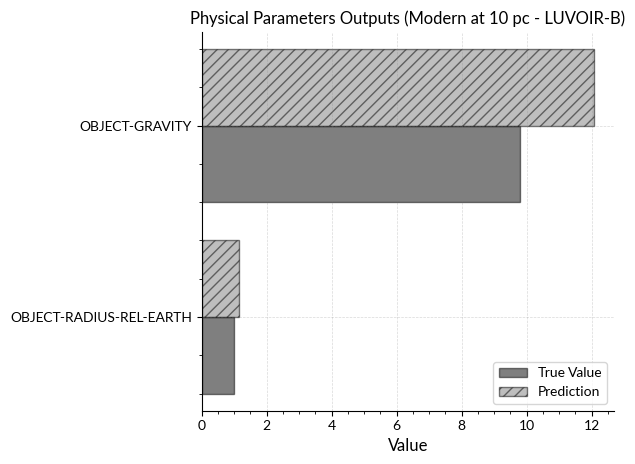

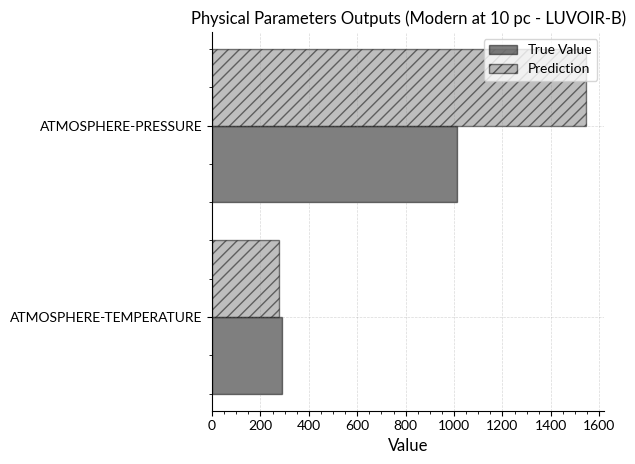

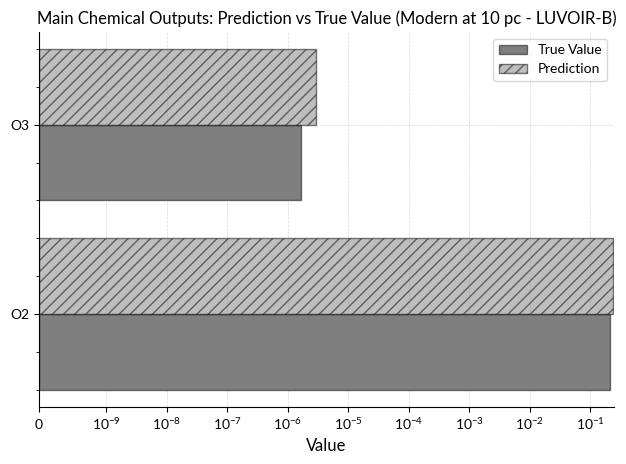

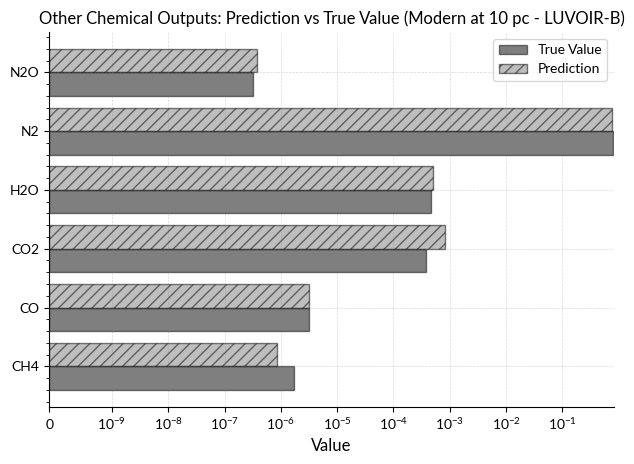



Processing file: proterozoic10pc_luvoir.npy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step

Physical Outputs Comparison:


,Target,Prediction,True Value,Difference
0,OBJECT-RADIUS-REL-EARTH,1.152676,0.998887,0.153789
1,OBJECT-GRAVITY,12.300307,9.807000,2.493307
2,ATMOSPHERE-TEMPERATURE,281.349335,289.000000,-7.650665
3,ATMOSPHERE-PRESSURE,1599.095825,959.000000,640.095703



Main Chemical Outputs Comparison:


,Target,Prediction,True Value,Difference
0,O2,2.699810e-03,2.629730e-03,7.009000e-05
1,O3,4.000000e-08,3.000000e-08,1.000000e-08



Other Chemical Outputs Comparison:


,Target,Prediction,True Value,Difference
0,CH4,2.975300e-03,2.139460e-03,8.358300e-04
1,CO,1.780000e-05,1.741000e-05,3.800000e-07
2,CO2,1.257812e-02,1.252251e-02,5.561000e-05
3,H2O,4.269800e-03,4.682740e-03,-4.129500e-04
4,N2,9.791974e-01,9.780081e-01,1.189330e-03
5,N2O,1.000000e-08,1.000000e-08,-0.000000e+00


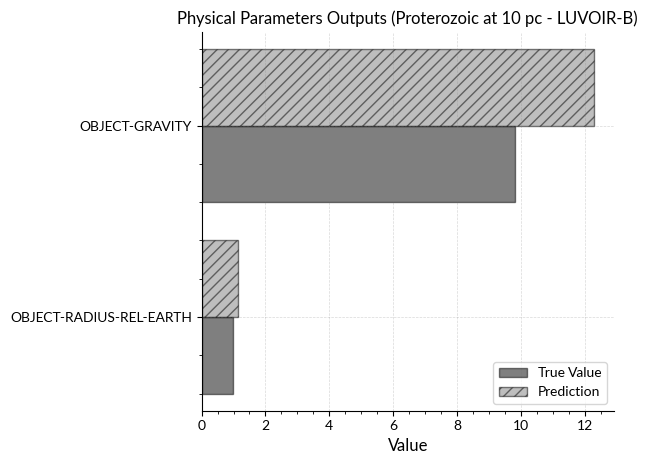

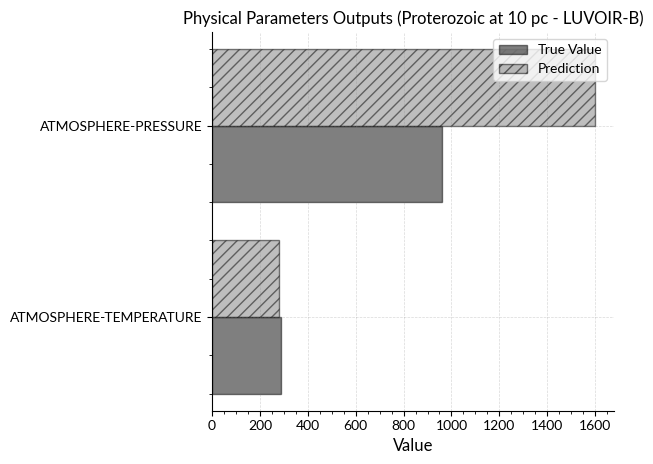

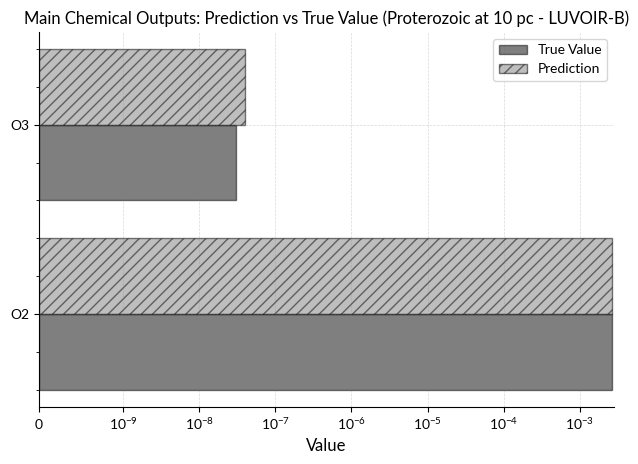

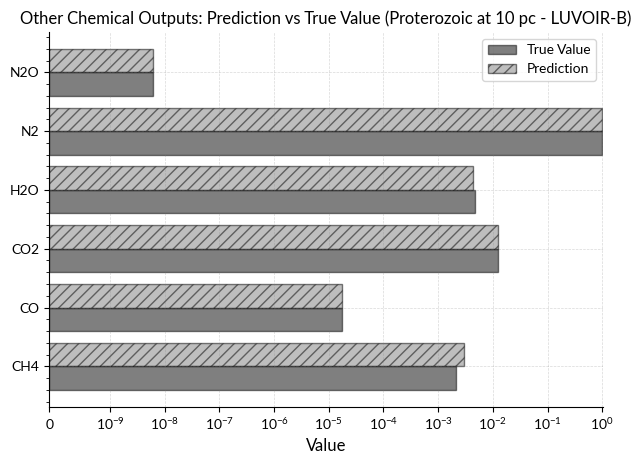



Processing file: modernwithoutO2_10pc_luvoir.npy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step

Physical Outputs Comparison:


,Target,Prediction,True Value,Difference
0,OBJECT-RADIUS-REL-EARTH,1.124545,0.998887,0.125658
1,OBJECT-GRAVITY,11.741575,9.807000,1.934575
2,ATMOSPHERE-TEMPERATURE,294.982697,288.200000,6.782697
3,ATMOSPHERE-PRESSURE,1457.509644,1013.000000,444.509644



Main Chemical Outputs Comparison:


,Target,Prediction,True Value,Difference
0,O2,0.003691,0.000000,0.003691
1,O3,0.000004,0.000002,0.000002



Other Chemical Outputs Comparison:


,Target,Prediction,True Value,Difference
0,CH4,6.000000e-08,1.720000e-06,-1.660000e-06
1,CO,6.500000e-07,3.210000e-06,-2.560000e-06
2,CO2,4.555000e-05,3.830100e-04,-3.374500e-04
3,H2O,4.014000e-04,4.620700e-04,-6.067000e-05
4,N2,1.000000e+00,7.882168e-01,2.117832e-01
5,N2O,7.000000e-08,3.200000e-07,-2.500000e-07


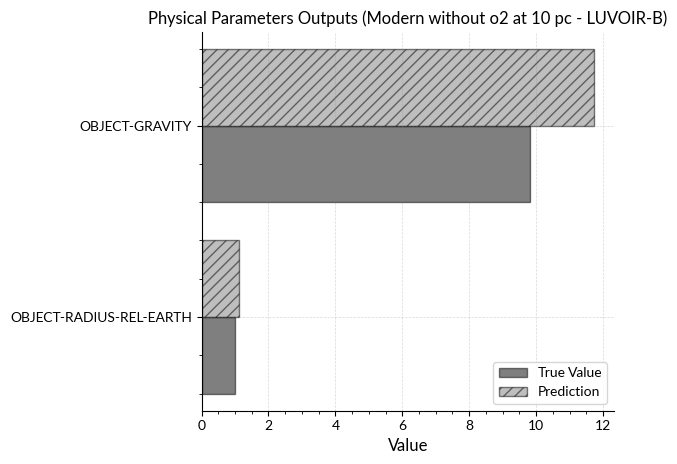

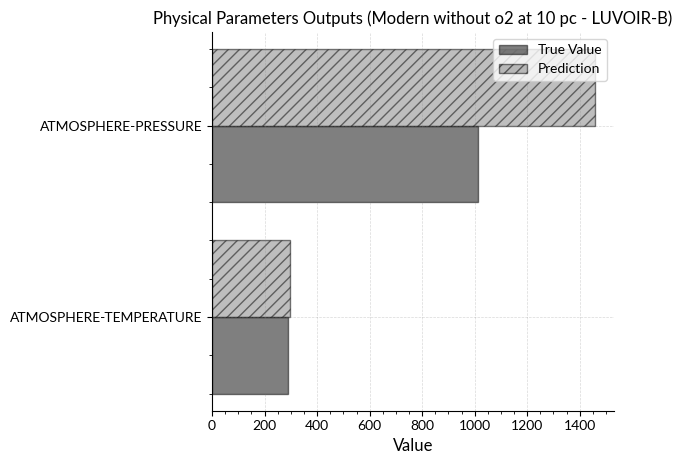

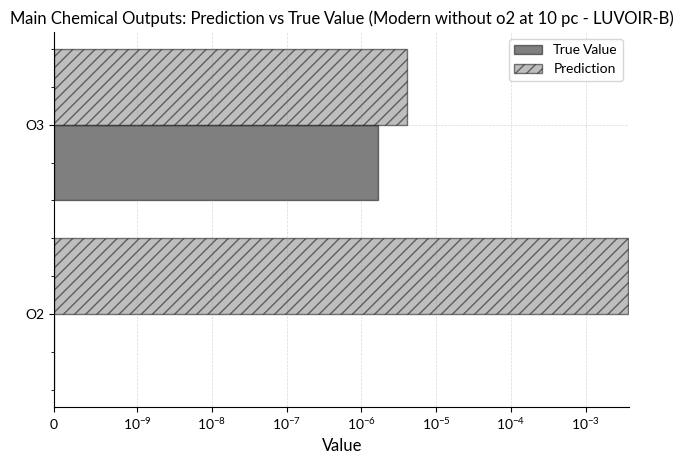

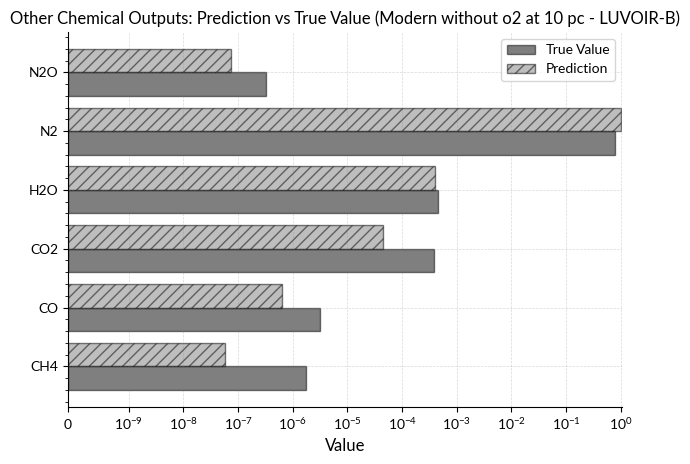



Processing file: proterozoic15pc_luvoir.npy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step

Physical Outputs Comparison:


,Target,Prediction,True Value,Difference
0,OBJECT-RADIUS-REL-EARTH,1.036234,0.998887,0.037347
1,OBJECT-GRAVITY,10.350063,9.807000,0.543063
2,ATMOSPHERE-TEMPERATURE,281.835968,289.000000,-7.164032
3,ATMOSPHERE-PRESSURE,1127.397339,959.000000,168.397339



Main Chemical Outputs Comparison:


,Target,Prediction,True Value,Difference
0,O2,2.017540e-03,2.629730e-03,-6.121900e-04
1,O3,6.000000e-08,3.000000e-08,3.000000e-08



Other Chemical Outputs Comparison:


,Target,Prediction,True Value,Difference
0,CH4,5.029570e-03,2.139460e-03,0.002890
1,CO,2.399000e-05,1.741000e-05,0.000007
2,CO2,2.036216e-02,1.252251e-02,0.007840
3,H2O,6.375820e-03,4.682740e-03,0.001693
4,N2,9.651054e-01,9.780081e-01,-0.012903
5,N2O,1.000000e-08,1.000000e-08,0.000000


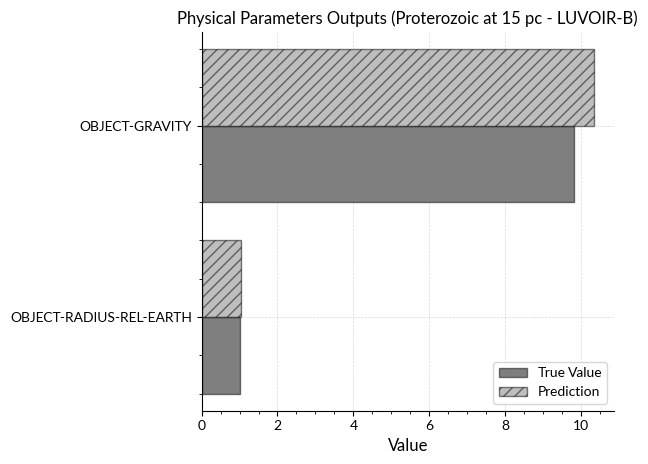

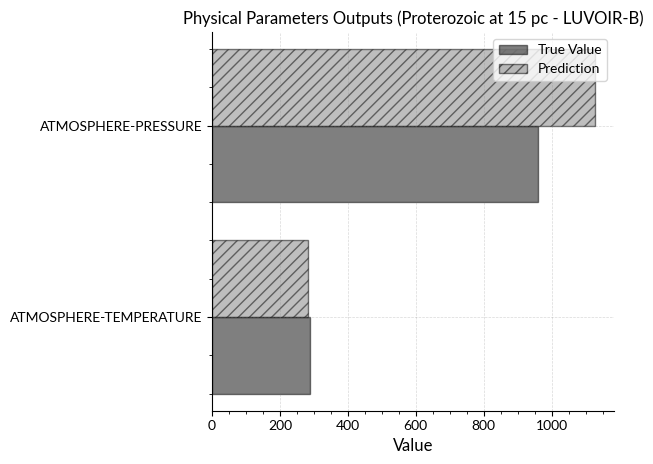

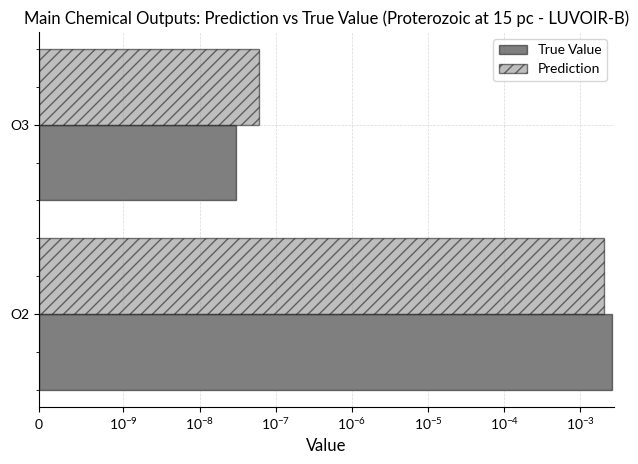

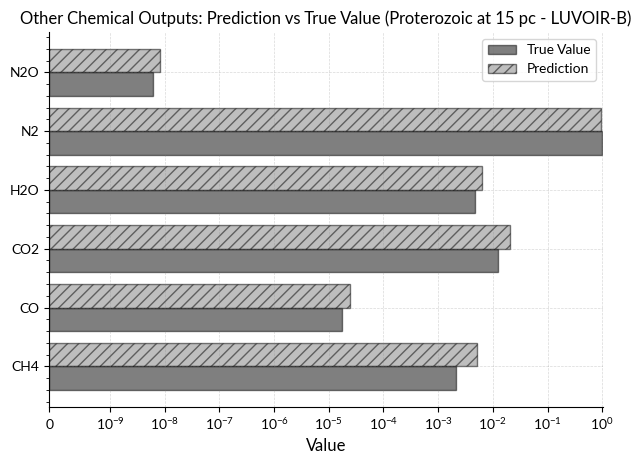



Processing file: modern5pc_luvoir.npy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step

Physical Outputs Comparison:


,Target,Prediction,True Value,Difference
0,OBJECT-RADIUS-REL-EARTH,1.149669,0.998887,0.150782
1,OBJECT-GRAVITY,12.195590,9.807000,2.388591
2,ATMOSPHERE-TEMPERATURE,276.023773,288.200000,-12.176227
3,ATMOSPHERE-PRESSURE,1573.850098,1013.000000,560.850098



Main Chemical Outputs Comparison:


,Target,Prediction,True Value,Difference
0,O2,0.187752,0.210931,-0.023179
1,O3,0.000003,0.000002,0.000001



Other Chemical Outputs Comparison:


,Target,Prediction,True Value,Difference
0,CH4,8.800000e-07,1.720000e-06,-8.400000e-07
1,CO,2.360000e-06,3.210000e-06,-8.500000e-07
2,CO2,4.150300e-04,3.830100e-04,3.202000e-05
3,H2O,4.210500e-04,4.620700e-04,-4.102000e-05
4,N2,7.969925e-01,7.882168e-01,8.775840e-03
5,N2O,3.200000e-07,3.200000e-07,-1.000000e-08


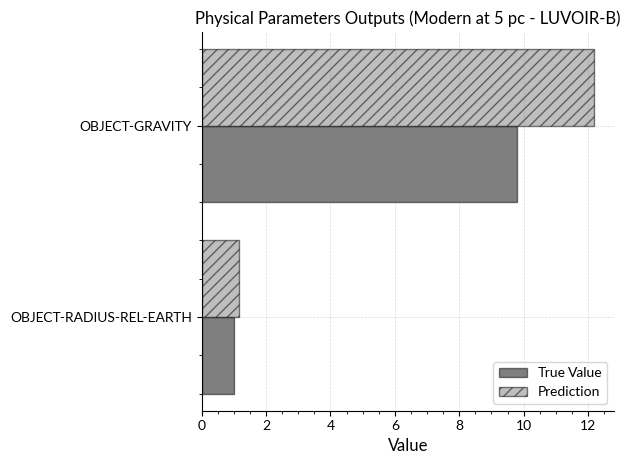

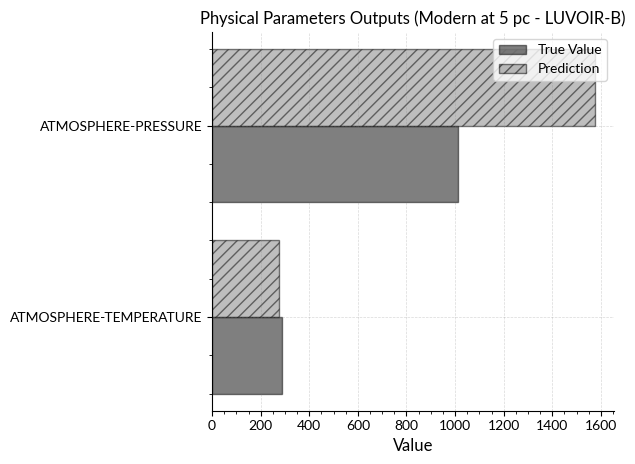

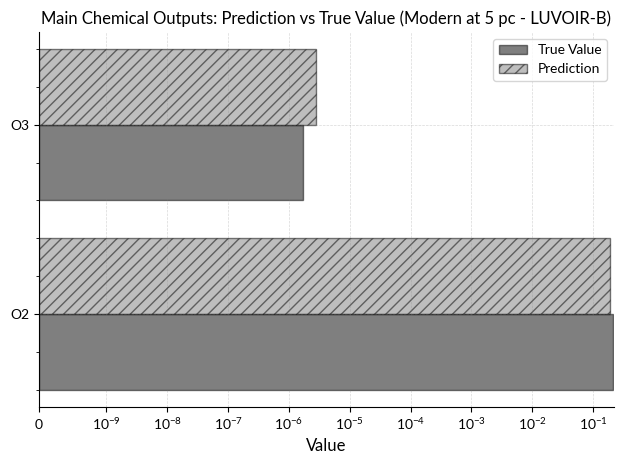

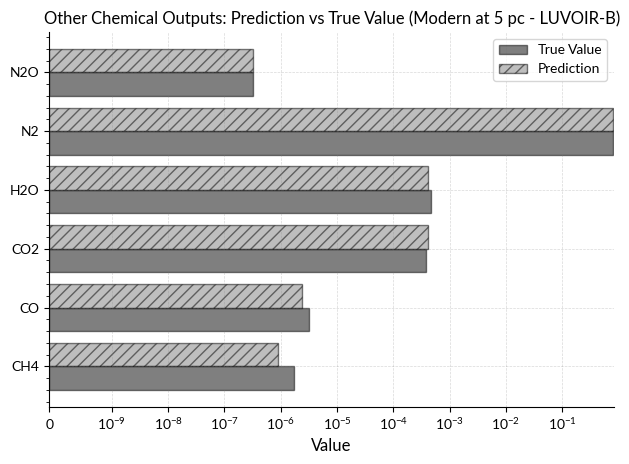

In [16]:
npy_files = glob.glob("../data/tests/*luvoir*.npy")

for file_path in npy_files:
    ############ DATA PROCESSING ############
    file_name = os.path.basename(file_path)
    formatted_title = format_title_luvoir(file_name)
    print(f"Processing file: {file_name}")
    
    data = np.load(file_path, allow_pickle=True)
    
    uv = data[0]["NOISY_ALBEDO"]
    vis = data[1]["NOISY_ALBEDO"]
    nir = data[2]["NOISY_ALBEDO"]
    
    uv_mean, uv_std = stats['inputs']['B-UV']['mean'], stats['inputs']['B-UV']['std']
    vis_mean, vis_std = stats['inputs']['B-Vis']['mean'], stats['inputs']['B-Vis']['std']
    nir_mean, nir_std = stats['inputs']['B-NIR']['mean'], stats['inputs']['B-NIR']['std']

    ############ DENORMALIZATION ############
    uv_normalized = (uv - uv_mean) / uv_std
    vis_normalized = (vis - vis_mean) / vis_std
    nir_normalized = (nir - nir_mean) / nir_std

    uv_normalized = uv_normalized.reshape(1, 8, 1)
    vis_normalized = vis_normalized.reshape(1, 94, 1)
    nir_normalized = nir_normalized.reshape(1, 49, 1)
    
    predictions = model_load.predict([uv_normalized, vis_normalized, nir_normalized])
    
    physical_pred = denormalize_physical(predictions['physical_output'], stats, physical_targets)
    main_chem_pred = denormalize_chemical(predictions['main_chemical_output'], stats, main_chemical_targets)
    other_chem_pred = denormalize_chemical(predictions['other_chemical_output'], stats, other_chemical_targets)
    
    ############ COMPARISON TABLES ############
    def get_gt(target):
        val = data[0].get(target, None)
        if val is None:
            return 0.0
        try:
            return float(val)
        except (ValueError, TypeError):
            return 0.0

    def build_comparison_df(targets, pred_values):
        data_list = []
        for i, target in enumerate(targets):
            pred_val = pred_values[0][i]
            gt_val = get_gt(target)
            diff = pred_val - gt_val
            data_list.append({
                "Target": target,
                "Prediction": pred_val,
                "True Value": gt_val,
                "Difference": diff
            })
        return pd.DataFrame(data_list)

    physical_df = build_comparison_df(physical_targets, physical_pred)
    main_chem_df = build_comparison_df(main_chemical_targets, main_chem_pred)
    other_chem_df = build_comparison_df(other_chemical_targets, other_chem_pred)
    
    print("\nPhysical Outputs Comparison:")
    display(physical_df.round(8))
    
    if 'archean' not in file_name.lower():
        print("\nMain Chemical Outputs Comparison:")
        display(main_chem_df.round(8))
    
    print("\nOther Chemical Outputs Comparison:")
    display(other_chem_df.round(8))

    ############ PLOTTING ############
    low_physical_targets = ["OBJECT-RADIUS-REL-EARTH", "OBJECT-GRAVITY"]
    high_physical_targets = ["ATMOSPHERE-TEMPERATURE", "ATMOSPHERE-PRESSURE"]
    
    low_physical_df = physical_df[physical_df["Target"].isin(low_physical_targets)]
    high_physical_df = physical_df[physical_df["Target"].isin(high_physical_targets)]
    
    if not low_physical_df.empty:
        y_low = range(len(low_physical_df))
        plt.barh(y_low, low_physical_df["True Value"], height=0.4, label="True Value",
                    color='black', alpha=0.5, edgecolor='black')
        plt.barh([i + 0.4 for i in y_low], low_physical_df["Prediction"], height=0.4, label="Prediction",
                    color='tab:gray', alpha=0.5, edgecolor='black', hatch='///')
        plt.yticks([i + 0.2 for i in y_low], low_physical_df["Target"])
        plt.xlabel("Value")
        plt.title(f"Physical Parameters Outputs ({formatted_title})")
        plt.legend()
        plt.tight_layout()
        plt.show()

    if not high_physical_df.empty:
        y_high = range(len(high_physical_df))
        plt.barh(y_high, high_physical_df["True Value"], height=0.4, label="True Value",
                    color='black', alpha=0.5, edgecolor='black')
        plt.barh([i + 0.4 for i in y_high], high_physical_df["Prediction"], height=0.4, label="Prediction",
                    color='tab:gray', alpha=0.5, edgecolor='black', hatch='///')
        plt.yticks([i + 0.2 for i in y_high], high_physical_df["Target"])
        plt.xlabel("Value")
        plt.title(f"Physical Parameters Outputs ({formatted_title})")
        plt.legend(loc="upper right")
        plt.tight_layout()
        plt.show()

    if 'archean' not in file_name.lower():
        y_main = range(len(main_chem_df))
        plt.barh(y_main, main_chem_df["True Value"], height=0.4, label="True Value",
                    color='black', alpha=0.5, edgecolor='black')
        plt.barh([i + 0.4 for i in y_main], main_chem_df["Prediction"], height=0.4, label="Prediction",
                    color='tab:gray', alpha=0.5, edgecolor='black', hatch='///')
        plt.yticks([i + 0.2 for i in y_main], main_chem_df["Target"])
        plt.xlabel("Value")
        plt.title(f"Main Chemical Outputs: Prediction vs True Value ({formatted_title})")
        plt.legend(loc="upper right")
        plt.xscale('symlog', linthresh=1e-9)
        plt.tight_layout()
        plt.show()

    y_other = range(len(other_chem_df))
    plt.barh(y_other, other_chem_df["True Value"], height=0.4, label="True Value",
                color='black', alpha=0.5, edgecolor='black')
    plt.barh([i + 0.4 for i in y_other], other_chem_df["Prediction"], height=0.4, label="Prediction",
                color='tab:gray', alpha=0.5, edgecolor='black', hatch='///')
    plt.yticks([i + 0.2 for i in y_other], other_chem_df["Target"])
    plt.xlabel("Value")
    plt.title(f"Other Chemical Outputs: Prediction vs True Value ({formatted_title})")
    plt.legend(loc="upper right")
    plt.xscale('symlog', linthresh=1e-9)
    plt.tight_layout()
    plt.show()

    print("\n" + "="*100 + "\n")

# Recover the spectrum

In [17]:
def get_config_data(stage="modern"):
    dg = datagen.DataGen(stage=stage)
    config_str = dg.config_str
    config_dict = dg._parse_config(config_str)
    datamod.mixing_ratio_constant(config_dict, 60)
    datamod.normalize_layer(config_dict, 60, st_.molweightlist(era=stage))
    return dg, config_dict

In [18]:
def generate_original_spectrum(config, instrument, dg):
    config_serialized = dg._serialize_config(config)
    wavelength, total, noise, _ = dg._generate_spectrum_for_instrument(config_serialized, instrument)
    noisy_albedo = np.random.normal(loc=total, scale=noise)
    df = pd.DataFrame({
        "WAVELENGTH": wavelength,
        "ALBEDO": total,
        "NOISE": noise,
        "NOISY_ALBEDO": noisy_albedo
    })
    return df

In [19]:
def generate_modified_spectrum(config, instrument, dg, radius, gravity, temperature, pressure, gas_values):
    modified_config = config.copy()

    modified_config['OBJECT-DIAMETER'] = radius * (2 * R_earth.to("km").value)
    modified_config['OBJECT-GRAVITY'] = gravity
    modified_config['ATMOSPHERE-TEMPERATURE'] = temperature
    modified_config['ATMOSPHERE-PRESSURE'] = pressure

    elements = modified_config.get("ATMOSPHERE-LAYERS-MOLECULES", "").split(",")
    
    # Update each gas in the provided gas_values dictionary
    for gas, new_value in gas_values.items():
        if gas in elements:
            gas_index = elements.index(gas)
            for key, value in modified_config.items():
                if key.startswith("ATMOSPHERE-LAYER-"):
                    values = value.split(',')
                    values[gas_index + 2] = str(new_value)
                    modified_config[key] = ','.join(values)

    config_serialized = dg._serialize_config(modified_config)
    wavelength, total, noise, _ = dg._generate_spectrum_for_instrument(config_serialized, instrument)
    noisy_albedo = np.random.normal(loc=total, scale=noise)
    df = pd.DataFrame({
        "WAVELENGTH": wavelength,
        "ALBEDO": total,
        "NOISE": noise,
        "NOISY_ALBEDO": noisy_albedo
    })
    return df

Processing: Archean at 10 pc - LUVOIR-B with stage: archean
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


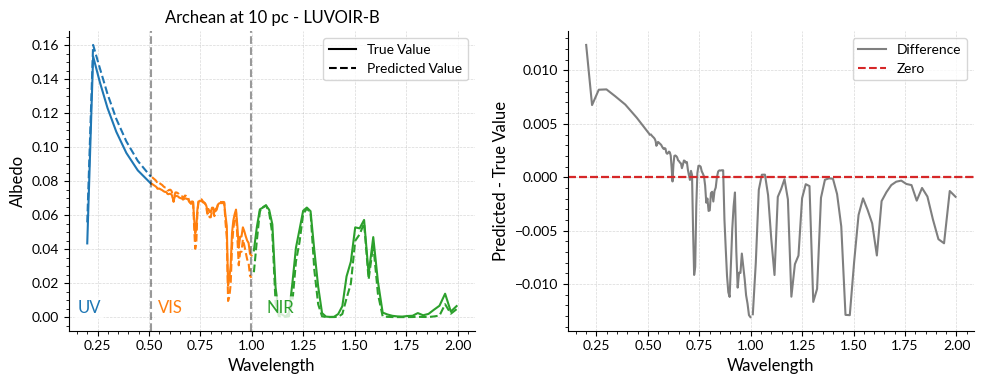

Processing: Modern at 10 pc - LUVOIR-B with stage: modern
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


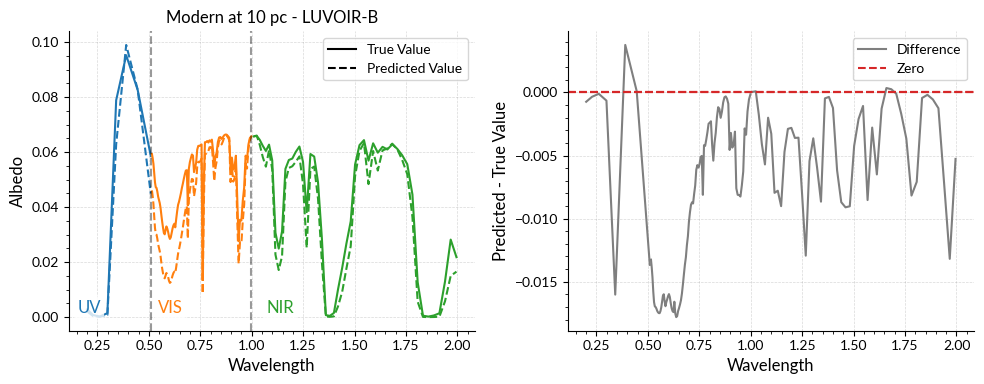

Processing: Proterozoic at 10 pc - LUVOIR-B with stage: proterozoic
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


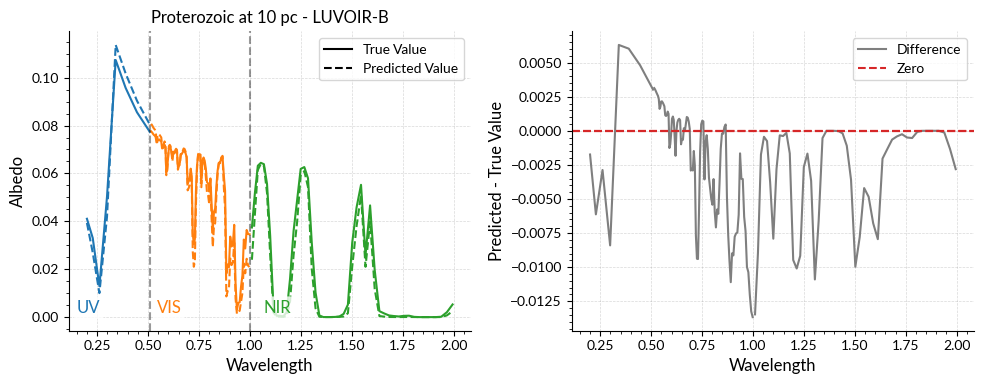

In [20]:
npy_files = glob.glob("../data/tests/*10pc*luvoir*.npy")
npy_files = [f for f in npy_files if "without" not in os.path.basename(f).lower()]

for file_path in npy_files:
    file_name = os.path.basename(file_path)
    formatted_title = format_title_luvoir(file_name)
    stage = get_stage_from_filename(file_name)
    print("Processing:", formatted_title, "with stage:", stage)
    
    # Load npy file (assumes similar structure as before)
    data = np.load(file_path, allow_pickle=True)
    uv = data[0]["NOISY_ALBEDO"]
    vis = data[1]["NOISY_ALBEDO"]
    nir = data[2]["NOISY_ALBEDO"]
    
    # Normalize each band using loaded stats
    uv_norm = (uv - stats['inputs']['B-UV']['mean']) / stats['inputs']['B-UV']['std']
    vis_norm = (vis - stats['inputs']['B-Vis']['mean']) / stats['inputs']['B-Vis']['std']
    nir_norm = (nir - stats['inputs']['B-NIR']['mean']) / stats['inputs']['B-NIR']['std']
    
    # Reshape to match model input dimensions
    uv_norm = uv_norm.reshape(1, 8, 1)
    vis_norm = vis_norm.reshape(1, 94, 1)
    nir_norm = nir_norm.reshape(1, 49, 1)
    
    # Get predictions from the model using the npy data
    predictions = model_load.predict([uv_norm, vis_norm, nir_norm])
    physical_pred = denormalize_physical(predictions['physical_output'], stats, physical_targets)
    main_chem_pred = denormalize_chemical(predictions['main_chemical_output'], stats, main_chemical_targets)
    other_chem_pred = denormalize_chemical(predictions['other_chemical_output'], stats, other_chemical_targets)
    
    # Extract predicted physical parameters
    predicted_radius      = physical_pred[0, 0] 
    predicted_gravity     = physical_pred[0, 1]
    predicted_temperature = physical_pred[0, 2]
    predicted_pressure    = physical_pred[0, 3]
    
    # Merge chemical predictions into a dictionary.
    predicted_gas_values = {
        "O2": main_chem_pred[0, 0],
        "O3": main_chem_pred[0, 1],
        "CH4": other_chem_pred[0, 0],
        "CO": other_chem_pred[0, 1],
        "CO2": other_chem_pred[0, 2],
        "H2O": other_chem_pred[0, 3],
        "N2": other_chem_pred[0, 4],
        "N2O": other_chem_pred[0, 5]
    }
    
    dg, config = get_config_data(stage)
    uv_real  = generate_original_spectrum(config, "B-UV", dg)
    vis_real = generate_original_spectrum(config, "B-Vis", dg)
    nir_real = generate_original_spectrum(config, "B-NIR", dg)
    
    uv_pred  = generate_modified_spectrum(config, "B-UV", dg,
                                            predicted_radius,
                                            predicted_gravity,
                                            predicted_temperature,
                                            predicted_pressure,
                                            predicted_gas_values)
    vis_pred = generate_modified_spectrum(config, "B-Vis", dg,
                                            predicted_radius,
                                            predicted_gravity,
                                            predicted_temperature,
                                            predicted_pressure,
                                            predicted_gas_values)
    nir_pred = generate_modified_spectrum(config, "B-NIR", dg,
                                            predicted_radius,
                                            predicted_gravity,
                                            predicted_temperature,
                                            predicted_pressure,
                                            predicted_gas_values)
    
    b_uv_end = uv_real["WAVELENGTH"].iloc[-1]
    b_vis_end = vis_real["WAVELENGTH"].iloc[-1]

    _, axes = plt.subplots(1, 2, figsize=(10, 4))
    # Plot all channels on left axis
    axes[0].plot(uv_real["WAVELENGTH"], uv_real["ALBEDO"], color="tab:blue")
    axes[0].plot(uv_pred["WAVELENGTH"], uv_pred["ALBEDO"], linestyle="--", color="tab:blue")

    axes[0].plot(vis_real["WAVELENGTH"], vis_real["ALBEDO"], color="tab:orange")
    axes[0].plot(vis_pred["WAVELENGTH"], vis_pred["ALBEDO"], linestyle="--", color="tab:orange")

    axes[0].plot(nir_real["WAVELENGTH"], nir_real["ALBEDO"], color="tab:green")
    axes[0].plot(nir_pred["WAVELENGTH"], nir_pred["ALBEDO"], linestyle="--", color="tab:green")

    axes[0].axvline(b_uv_end, color='k', linestyle='--', alpha=0.4)
    axes[0].axvline(b_vis_end, color='k', linestyle='--', alpha=0.4)

    axes[0].text(0.05, 0.05, "UV", color='tab:blue', ha='center', va='bottom',
                 transform=axes[0].transAxes,
                 bbox=dict(facecolor='white', alpha=0.8, edgecolor='none', boxstyle='round,pad=0.2'))

    axes[0].text(0.25, 0.05, "VIS", color='tab:orange', ha='center', va='bottom',
                 transform=axes[0].transAxes,
                 bbox=dict(facecolor='white', alpha=0.8, edgecolor='none', boxstyle='round,pad=0.2'))

    axes[0].text(0.52, 0.05, "NIR", color='tab:green', ha='center', va='bottom',
                 transform=axes[0].transAxes,
                 bbox=dict(facecolor='white', alpha=0.8, edgecolor='none', boxstyle='round,pad=0.2'))

    axes[0].set_xlabel("Wavelength")
    axes[0].set_ylabel("Albedo")
    axes[0].set_title(f"{formatted_title}")
    
    # Create custom legend with 2 items: solid for True Value, dashed for Predicted Value.
    true_line = Line2D([], [], color='k', linestyle='-', label='True Value')
    pred_line = Line2D([], [], color='k', linestyle='--', label='Predicted Value')
    axes[0].legend(handles=[true_line, pred_line])

    # Plot difference on right axis for each channel
    channels = [("UV", uv_real, uv_pred),
                ("VIS", vis_real, vis_pred),
                ("NIR", nir_real, nir_pred)]
    for label, df_real, df_pred in channels:
        diff = df_pred["ALBEDO"] - df_real["ALBEDO"]
        axes[1].plot(df_real["WAVELENGTH"], diff, color="tab:gray")
        axes[1].axhline(0, color='tab:red', linestyle='--')
    
    line = Line2D([], [], color='tab:gray', linestyle='-', label='Difference')
    dashed = Line2D([], [], color='tab:red', linestyle='--', label='Zero')

    axes[1].legend(handles=[line, dashed])
    axes[1].set_xlabel("Wavelength")
    axes[1].set_ylabel("Predicted - True Value")
    
    plt.tight_layout()
    plt.show()